# Наивный байесовский классификатор

Наивный байесовский классификатор основан на теореме Байеса, которая позволяет вычислять вероятность того, что объект принадлежит определенному классу, исходя из его признаков. Основная идея этого метода заключается в предположении, что все признаки независимы друг от друга, что в реальных данных, как правило, не выполняется.

*   Гауссовский наивный байесовский классификатор — используется для работы с непрерывными признаками, которые предполагаются нормально распределенными (гауссовыми). Это наиболее подходящий тип для задач, где данные имеют непрерывные признаки, такие как, например, возраст или рост.
*   Мультиномиальный наивный байесовский классификатор — предназначен для обработки дискретных признаков, обычно встречается в задачах текстовой классификации (например, в анализе частоты слов в документах). Модель вычисляет вероятности появления слов в различных классах, исходя из их частоты.
*   Бернуллиевский наивный байесовский классификатор — используется для бинарных признаков, где каждый признак может принимать одно из двух значений (например, 0 или 1). Такой классификатор часто используется в задачах, где данные представляют собой бинарные признаки.
*   Категориальный наивный байесовский классификатор — применяется для работы с категориальными признаками. В этом случае каждый признак принимает конечное число значений, и модель вычисляет вероятности каждого значения признака для каждого класса. Это часто используется для задач, где признаки представляют собой категориальные данные, такие как цвета, типы, категории и т. д.
*   Континуальный наивный байесовский классификатор — используется для задач, где признаки являются непрерывными, но распределение признаков отличается от нормального.








## Из методички

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
data = datasets.load_breast_cancer()

In [4]:
X = data.data[:,:2]
y = data.target

In [5]:
# информация о количестве разных значений целевой переменной
df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()

,count
target,
1,357
0,212


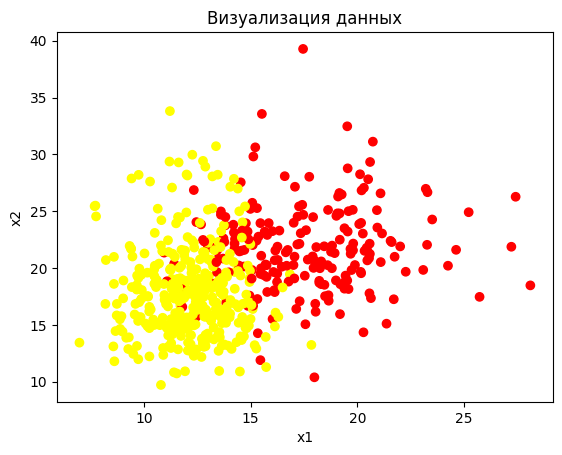

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')

plt.title('Визуализация данных')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Для создания модели наивного байесовского классификатора необходимо выбрать то, каким именно распределением модель будет аппроксимировать функцию плотности вероятности непрерывных переменных.

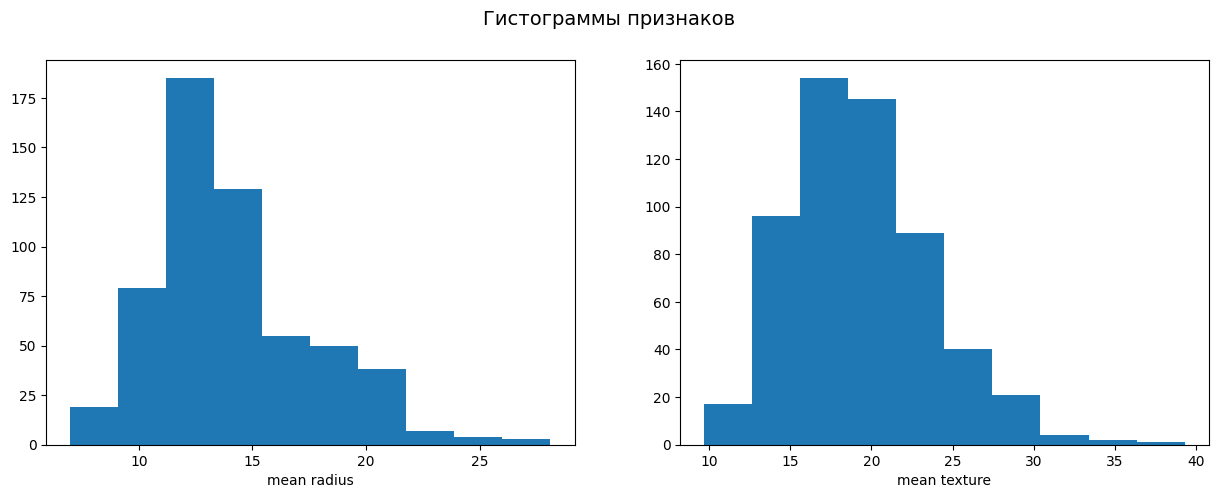

In [7]:
plt.figure(figsize=(15, 5))
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.hist(X[:, i])
    plt.xlabel(data.feature_names[i])
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

Из графиков видно, что форма распределения обоих признаков напоминает нормальное. Можно принять гипотезу о нормальности распределения наших признаков и использовать модель наивного Байеса с гауссовой аппроксимацией.

In [8]:
from sklearn.naive_bayes import GaussianNB

In [9]:
gaussian_nb = GaussianNB()

In [10]:
gaussian_nb.fit(X, y)

GaussianNB()

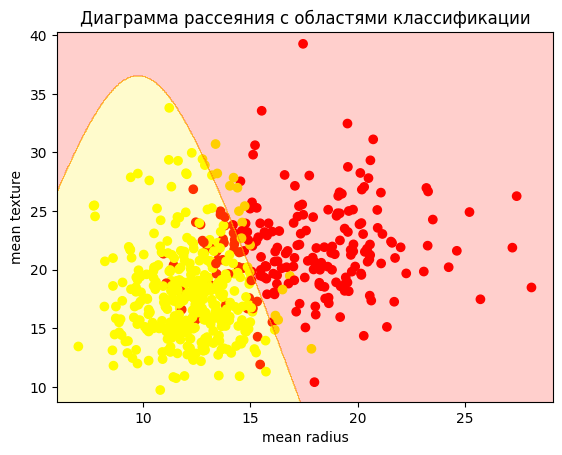

In [11]:
X0 = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)
XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

Z = gaussian_nb.predict(XX).reshape(X0_grid.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('mean radius')
plt.ylabel('mean texture')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show()

In [12]:
y_pred = gaussian_nb.predict(X)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [14]:
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[164  48]
 [ 17 340]]
Accuracy=  0.8857644991212654
F1_score=  0.912751677852349


In [15]:
X = data.data
y = data.target
X.shape, y.shape

((569, 30), (569,))

In [16]:
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[189  23]
 [ 10 347]]
Accuracy=  0.9420035149384886
F1_score=  0.9546079779917469


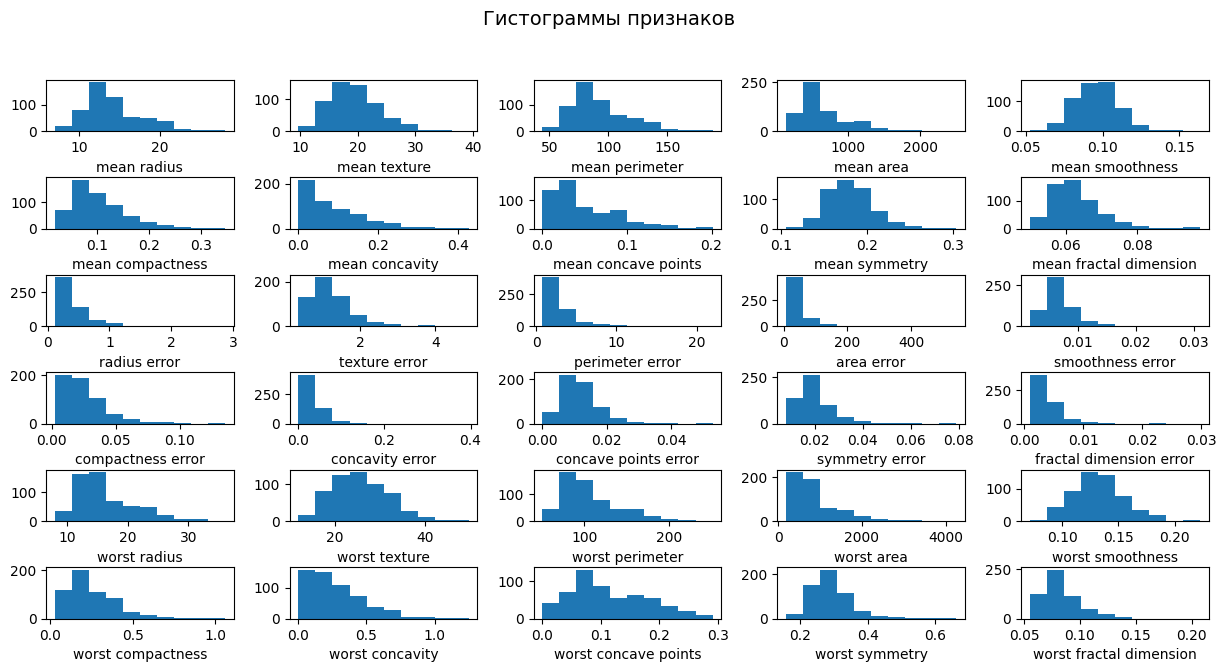

In [17]:
f = plt.figure(figsize=(15, 7))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.hist(X[:, i])

    plt.xlabel(data.feature_names[i])
f.subplots_adjust(hspace=0.9,wspace=0.3)
plt.suptitle('Гистограммы признаков',fontsize=14)
plt.show()

Некоторые распределения совсем на него не похожи. Удалим из набора данных те признаки, которые по своему виду распределения сильно отличаются от нормального.

In [18]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df = df.drop(['mean concavity','radius error',
              'perimeter error', 'area error',
              'compactness error', 'concavity error',
              'fractal dimension error', 'worst area',
              'worst concavity'], axis=1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concave points,mean symmetry,mean fractal dimension,texture error,...,concave points error,symmetry error,worst radius,worst texture,worst perimeter,worst smoothness,worst compactness,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,...,0.01587,0.03003,25.38,17.33,184.60,0.1622,0.6656,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,...,0.01340,0.01389,24.99,23.41,158.80,0.1238,0.1866,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,...,0.02058,0.02250,23.57,25.53,152.50,0.1444,0.4245,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,...,0.01867,0.05963,14.91,26.50,98.87,0.2098,0.8663,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,...,0.01885,0.01756,22.54,16.67,152.20,0.1374,0.2050,0.1625,0.2364,0.07678


In [19]:
X = df
y = data.target
X.shape, y.shape

((569, 21), (569,))

In [20]:
gaussian_nb = GaussianNB().fit(X, y)
y_pred = gaussian_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[196  16]
 [ 15 342]]
Accuracy=  0.945518453427065
F1_score=  0.9566433566433566


## Задания для самостоятельного выполнения

*1. На использованном в работе наборе данных примените другие вариации модели наивного Байеса - Мультономиальный, Бернулли, категориальные и комплементарный. Для каждой модели сделайте вывод о ее применимости.*

In [21]:
data = datasets.load_breast_cancer()
X = data.data[:,:2]
y = data.target
df = pd.DataFrame(data.data[:,:2], columns=data.feature_names[:2])
df['target'] = data.target
df['target'].value_counts()

,count
target,
1,357
0,212


In [22]:
from sklearn.naive_bayes import MultinomialNB
multinomial_nb = MultinomialNB().fit(X, y)
y_pred = multinomial_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[ 36 176]
 [  7 350]]
Accuracy=  0.6783831282952548
F1_score=  0.7927519818799547


In [23]:
from sklearn.naive_bayes import ComplementNB
compl_nb = ComplementNB().fit(X, y)
y_pred = compl_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[134  78]
 [136 221]]
Accuracy=  0.6239015817223199
F1_score=  0.6737804878048781


In [24]:
from sklearn.naive_bayes import BernoulliNB
bern_nb = BernoulliNB().fit(X, y)
y_pred = bern_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[  0 212]
 [  0 357]]
Accuracy=  0.6274165202108963
F1_score=  0.7710583153347732


In [25]:
from sklearn.naive_bayes import CategoricalNB
categorical_nb = CategoricalNB().fit(X, y)
y_pred = categorical_nb.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy= ', accuracy_score(y, y_pred))
print('F1_score= ', f1_score(y, y_pred))

[[178  34]
 [ 21 336]]
Accuracy=  0.9033391915641477
F1_score=  0.9243466299862448


*2. Загрузите набор данных о выживших на титанике, прилагающийся к этой работе. Повторите на нем моделирование из методических указаний. Попробуйте разные варианты байесовского классификатора в зависимости от форм расрпеделния эмпирических данных.*

In [26]:
data = pd.read_csv('https://github.com/koroteevmv/ML_course/blob/2024/ML3.6%20bayes/titanic.csv?raw=true')

In [27]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [28]:
# Гауссов наивный Байес
gaussian_nb = GaussianNB()
gaussian_nb.fit(X, y)
y_pred = gaussian_nb.predict(X)

print("Model: GaussianNB")
print(f"Accuracy: {accuracy_score(y, y_pred)}")
print(f"F1 Score: {f1_score(y, y_pred)}")
print(confusion_matrix(y, y_pred))

Model: GaussianNB
Accuracy: 0.7845117845117845
F1 Score: 0.7201166180758017
[[452  97]
 [ 95 247]]


In [29]:
# Мультиномиальный наивный Байес
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X, y)
y_pred = multinomial_nb.predict(X)

print("Model: MultinomialNB")
print(f"Accuracy: {accuracy_score(y, y_pred)}")
print(f"F1 Score: {f1_score(y, y_pred)}")
print(confusion_matrix(y, y_pred))

Model: MultinomialNB
Accuracy: 0.6666666666666666
F1 Score: 0.5232744783306581
[[431 118]
 [179 163]]


In [30]:
# Бернуллиевский наивный Байес
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X, y)
y_pred = bernoulli_nb.predict(X)

print("Model: BernoulliNB")
print(f"Accuracy: {accuracy_score(y, y_pred)}")
print(f"F1 Score: {f1_score(y, y_pred)}")
print(confusion_matrix(y, y_pred))

Model: BernoulliNB
Accuracy: 0.7845117845117845
F1 Score: 0.7159763313609467
[[457  92]
 [100 242]]


In [31]:
# Комплементарный наивный Байес
complement_nb = ComplementNB()
complement_nb.fit(X, y)
y_pred = complement_nb.predict(X)

print("Model: ComplementNB")
print(f"Accuracy: {accuracy_score(y, y_pred)}")
print(f"F1 Score: {f1_score(y, y_pred)}")
print(confusion_matrix(y, y_pred))


Model: ComplementNB
Accuracy: 0.6655443322109988
F1 Score: 0.526984126984127
[[427 122]
 [176 166]]


In [32]:
# Категориальный наивный Байес
categorical_nb = CategoricalNB()
categorical_nb.fit(X, y)
y_pred = categorical_nb.predict(X)

print("Model: CategoricalNB")
print(f"Accuracy: {accuracy_score(y, y_pred)}")
print(f"F1 Score: {f1_score(y, y_pred)}")
print(confusion_matrix(y, y_pred))

Model: CategoricalNB
Accuracy: 0.8709315375982043
F1 Score: 0.8233486943164362
[[508  41]
 [ 74 268]]


*3. Загрузите набор данных о Титанике с сайта Kaggle. Обратите внимание на обилие категориальных переменных. Примените на нем наивный байесовский классификатор.*

In [33]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
train_df = pd.read_csv('/content/drive/MyDrive/Datasets/Titanic/titanic_train.csv')  # Замените на путь к вашему файлу train.csv

train_df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [35]:
# наличие пропусков в каждом столбце
train_df.isnull().sum()

,0
passenger_id,0
pclass,0
name,0
sex,0
age,174
sibsp,0
parch,0
ticket,0
fare,1
cabin,659


In [36]:
# для числовых столбцов
train_df['age'].fillna(train_df['age'].median(), inplace=True)
train_df['fare'].fillna(train_df['fare'].median(), inplace=True)

# для категориальных столбцов
train_df['cabin'].fillna('U', inplace=True)
train_df['boat'].fillna('U', inplace=True)
train_df['body'].fillna('U', inplace=True)
train_df['home.dest'].fillna('U', inplace=True)

<ipython-input-36-eeb431b4d7c6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['age'].fillna(train_df['age'].median(), inplace=True)
<ipython-input-36-eeb431b4d7c6>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [37]:
train_df.isnull().sum()

,0
passenger_id,0
pclass,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
cabin,0


In [38]:
# категориальные переменные
train_df = pd.get_dummies(train_df, drop_first=True)

In [39]:
X_train = train_df.drop(columns=['survived'])
y_train = train_df['survived']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

print("Model: GaussianNB")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(confusion_matrix(y_test, y_pred))

Model: GaussianNB
Accuracy: 0.770949720670391
F1 Score: 0.7354838709677419
[[81 24]
 [17 57]]
